## Imports 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets, interactive
from IPython.display import Image

## RGB to HSV convertion 

In [2]:
def rgb2hsv(image):
    rgb = (image / 255).astype('float')
    
    max_values = np.max(rgb, axis=2)
    min_values = np.min(rgb, axis=2)
    
    max_indices = np.argmax(rgb, axis=2)
    min_indices = np.argmin(rgb, axis=2)
    
    range_values = max_values - min_values + 1e-9
    hsv = np.zeros(rgb.shape)
    
    hsv[max_indices == 0, 0] = (((60 * (rgb[:,:, 1] - rgb[:,:, 2]) / range_values).astype(int) + 360) % 360)[max_indices == 0]
    hsv[max_indices == 1, 0] = (((60 * (rgb[:,:, 2] - rgb[:,:, 0]) / range_values).astype(int) + 120) % 360)[max_indices == 1]
    hsv[max_indices == 2, 0] = (((60 * (rgb[:,:, 0] - rgb[:,:, 1]) / range_values).astype(int) + 240) % 360)[max_indices == 2]
    
    hsv[max_values != 0, 1] = (1 - min_values/ (max_values+ 1e-9))[max_values != 0]
    hsv[:,:, 1] *= 100
    hsv[:,:, 2] = max_values * 100
    
    return hsv


## HSV to RGB convertion

In [3]:
        
def hsv2rgb(image):

    h_i = (np.floor(image[:,:, 0] / 60.0) % 6).astype(int)
    v = image[:,:, 2] / 100
    s = image[:,:,1] / 100
    h_part = (image[:,:, 0] / 60.0) - np.floor(image[:,:, 0] / 60.0)
    v_min = v * (1.0 - s)
    v_dec = v * (1.0 - (h_part * s))
    v_inc = v * (1.0 - ((1.0 - h_part) * s))

    rgb = np.zeros(image.shape)
    rgb[h_i == 0] = np.stack((v, v_inc, v_min), axis=2)[h_i == 0]
    rgb[h_i == 1] = np.stack((v_dec, v, v_min), axis=2)[h_i == 1]
    rgb[h_i == 2] = np.stack((v_min, v, v_inc), axis=2)[h_i == 2]
    rgb[h_i == 3] = np.stack((v_min, v_dec, v), axis=2)[h_i == 3]
    rgb[h_i == 4] = np.stack((v_inc, v_min, v), axis=2)[h_i == 4]
    rgb[h_i == 5] = np.stack((v, v_min, v_dec), axis=2)[h_i == 5]

    return (rgb * 255).astype(int)

## Test

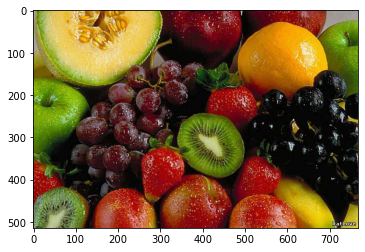

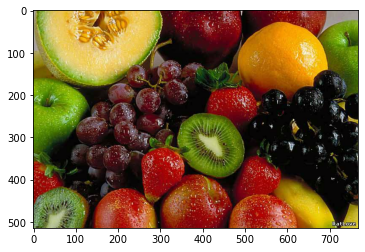

In [4]:
image = cv2.imread('./fruts.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
initial = image.copy()
plt.imshow(image)
plt.show()
hsv_image = rgb2hsv(image)

rgb_image = hsv2rgb(hsv_image)
plt.imshow(rgb_image)
plt.show()

## Params

In [7]:
hue_extra = 150
sat_extra = 0
val_extra = 80

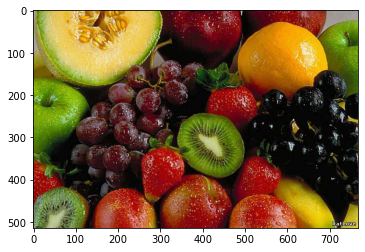

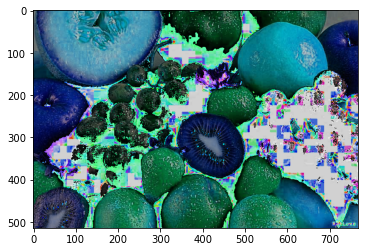

In [8]:
image = cv2.imread('./fruts.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

viz_image = image.copy()
hsv_image = rgb2hsv(viz_image)
hsv_image[:,:,0] = (hsv_image[:,:,0] + hue_extra).astype(int) % 360
hsv_image[:,:,1] = (hsv_image[:,:,1] + sat_extra).astype(int) % 101
hsv_image[:,:,2] = (hsv_image[:,:,2] + val_extra).astype(int) % 101
rgb_image = hsv2rgb(hsv_image)
plt.imshow(rgb_image)
plt.show()

## Save image

In [17]:
cv2.imwrite('color_shifted1.jpg', rgb_image)

True

## Add values to image

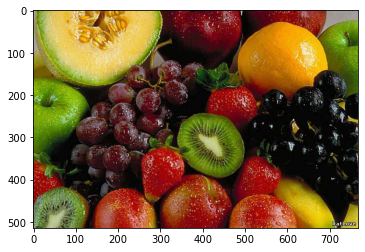

interactive(children=(IntSlider(value=0, description='hue_extra', max=360), IntSlider(value=0, description='sa…

In [15]:
image = cv2.imread('./fruts.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()
@interact(hue_extra=(0,360), sat_extra=(-100,100), val_extra=(-100,100))
def add_component(hue_extra=0, sat_extra=0, val_extra=0):
    viz_image = image.copy()
    hsv_image = rgb2hsv(viz_image)
    hsv_image[:,:,0] = (hsv_image[:,:,0] + hue_extra).astype(int) % 360
    hsv_image[:,:,1] = np.clip((hsv_image[:,:,1] + sat_extra).astype(int), 0, 100)
    hsv_image[:,:,2] = np.clip((hsv_image[:,:,2] + val_extra).astype(int),0, 100)
    rgb_image = hsv2rgb(hsv_image)
    plt.imshow(rgb_image)
    plt.show()